Dataset Sample:
    Hours Slept  Study Sessions  Pass/Fail
0     6.247241        1.597155          0
1     9.704286       13.091798          1
2     8.391964        6.972764          1
3     7.591951       10.662843          1
4     4.936112       18.243763          1

Stats : 
        Hours Slept  Study Sessions   Pass/Fail
count   100.000000      100.000000  100.000000
mean      6.821084       10.458803    0.630000
std       1.784936        5.569114    0.485237
min       4.033133        1.132090    0.000000
25%       5.159205        5.598086    0.000000
50%       6.784855       10.606872    1.000000
75%       8.381219       15.557488    1.000000
max       9.921322       19.727359    1.000000
Model Accuracy: 0.95
Confusion Matrix:
 [[ 8  0]
 [ 1 11]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94         8
           1       1.00      0.92      0.96        12

    accuracy                           0.95       

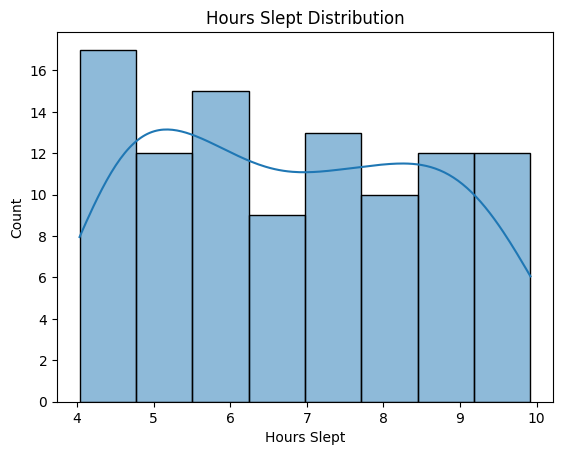

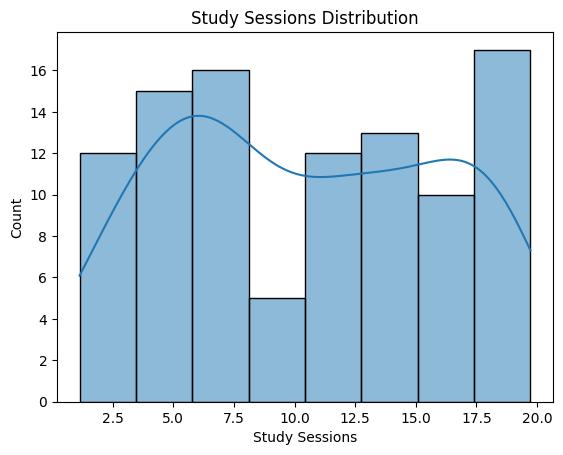

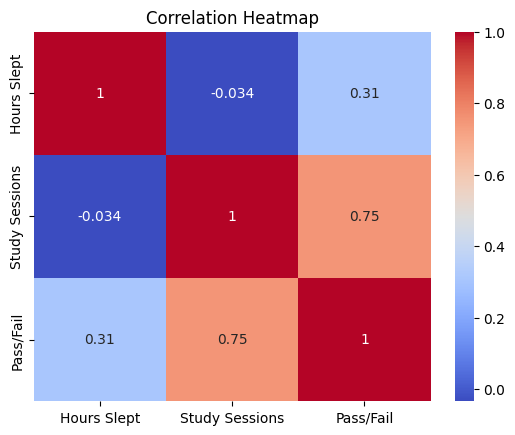

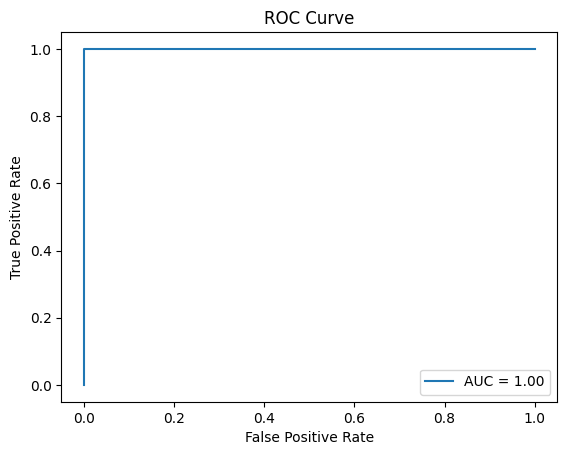

In [1]:
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Step 1: Create the synthetic dataset
np.random.seed(42)
num_samples = 100

hours_slept = np.random.uniform(4, 10, num_samples)
study_sessions = np.random.uniform(1, 20, num_samples)

# Target variable
pass_fail = (hours_slept * 0.4 + study_sessions * 0.3 + np.random.normal(0, 0.3, num_samples)) > 5
y = pass_fail.astype(int)

# Create DataFrame
data2 = pd.DataFrame({
    'Hours Slept': hours_slept,
    'Study Sessions': study_sessions,
    'Pass/Fail': y
})

print("Dataset Sample:\n", data2.head())
print("\nStats : \n", data2.describe())

# Step 2: Split data into training and testing sets
X2 = data2[['Hours Slept', 'Study Sessions']]
y2 = data2['Pass/Fail']
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

# Step 3: Train the logistic regression model
model2 = LogisticRegression()
model2.fit(X2_train, y2_train)

# Step 4: Evaluate the model
y2_pred = model2.predict(X2_test)
accuracy = accuracy_score(y2_test, y2_pred)

print("Model Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion_matrix(y2_test, y2_pred))
print("Classification Report:\n", classification_report(y2_test, y2_pred))

# Step 5: Predict new inputs
new_inputs = pd.DataFrame({
    'Hours Slept': [6, 8, 2],
    'Study Sessions': [10, 15, 5]
})
new_predictions = model2.predict(new_inputs)

print("New Inputs Predictions:\n", new_inputs)
print("Predicted Pass/Fail:\n", new_predictions)

# Visualizations
sns.histplot(data2['Hours Slept'], kde=True)
plt.title("Hours Slept Distribution")
plt.show()

sns.histplot(data2['Study Sessions'], kde=True)
plt.title("Study Sessions Distribution")
plt.show()

sns.heatmap(data2.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# ROC Curve and AUC Score
y_probs = model2.predict_proba(X2_test)[:, 1]  # Use predicted probabilities
fpr, tpr, thresholds = roc_curve(y2_test, y_probs)

plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y2_test, y_probs):.2f}")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [ ]:
pass_fail = (hours_slept * 0.4 + study_sessions * 0.3 + np.random.normal(0, 0.3, num_samples)) > 5
y = pass_fail.astype(int)

# Create DataFrame
data2 = pd.DataFrame({
    'Hours Slept': hours_slept,
    'Study Sessions': study_sessions,
    'Pass/Fail': y
})

print("Dataset Sample:\n", data2.head())
print("\nStats : \n", data2.describe())

# Step 2: Split data into training and testing sets
X2 = data2[['Hours Slept', 'Study Sessions']]
y2 = data2['Pass/Fail']
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

# Step 3: Train the logistic regression model
model2 = LogisticRegression()
model2.fit(X2_train, y2_train)

# Step 4: Evaluate the model
y2_pred = model2.predict(X2_test)
accuracy = accuracy_score(y2_test, y2_pred)

print("Model Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion_matrix(y2_test, y2_pred))
print("Classification Report:\n", classification_report(y2_test, y2_pred))

# Step 5: Predict new inputs
new_inputs = pd.DataFrame({
    'Hours Slept': [6, 8, 2],
    'Study Sessions': [10, 15, 5]
})
new_predictions = model2.predict(new_inputs)

print("New Inputs Predictions:\n", new_inputs)
print("Predicted Pass/Fail:\n", new_predictions)

# Visualizations
sns.histplot(data2['Hours Slept'], kde=True)
plt.title("Hours Slept Distribution")
plt.show()

sns.histplot(data2['Study Sessions'], kde=True)
plt.title("Study Sessions Distribution")
plt.show()

sns.heatmap(data2.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# ROC Curve and AUC Score
y_probs = model2.predict_proba(X2_test)[:, 1]  # Use predicted probabilities
fpr, tpr, thresholds = roc_curve(y2_test, y_probs)

plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y2_test, y_probs):.2f}")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()